# DAT402 Project 1 
#### By Garren Ramirez

For this project I chose to use the "COVID-19 Dataset" from Kaggle. (https://www.kaggle.com/datasets/meirnizri/covid19-dataset) My goal is to correctly classify if a patient will die based pre conditions of patients along with signs and symptoms from COVID-19, I also aim to identify which features show the most importance for predicting a patient death. 
Below, I've listed some defining features of the dataset, as per the Kaggle description. 

"The dataset was provided by the Mexican government https://datos.gob.mx/busca/dataset/informacion-referente-a-casos-covid-19-en-mexico This dataset contains an enormous number of anonymized patient-related information including pre-conditions. The raw dataset consists of 21 unique features and 1,048,576 unique patients. In the Boolean features, **1 means "yes" and 2 means "no". values as 97 and 99 are missing data.**

1. **Sex:** 1 for female and 2 for male.
2. **Age:** of the patient.
3. **Classification:** covid test findings. Values 1-3 mean that the patient was diagnosed with covid in different
degrees. 4 or higher means that the patient is not a carrier of covid or that the test is inconclusive.
4. **Patient type:** type of care the patient received in the unit. 1 for returned home and 2 for hospitalization.
5. **Pneumonia:** whether the patient already have air sacs inflammation or not.
6. **Pregnancy:** whether the patient is pregnant or not.
7. **Diabetes:** whether the patient has diabetes or not.
8. **Copd:** Indicates whether the patient has Chronic obstructive pulmonary disease or not.
9. **Asthma:** whether the patient has asthma or not.
10. **Inmsupr:** whether the patient is immunosuppressed or not.
11. **Hypertension:** whether the patient has hypertension or not.
12. **Cardiovascular:** whether the patient has heart or blood vessels related disease.
13. **Renal chronic:** whether the patient has chronic renal disease or not.
14. **Other disease:** whether the patient has other disease or not.
15. **Obesity:** whether the patient is obese or not.
16. **Tobacco:** whether the patient is a tobacco user.
17. **Usmr:** Indicates whether the patient treated medical units of the first, second or third level.
18. **Medical unit:** type of institution of the National Health System that provided the care.
19. **Intubed:** whether the patient was connected to the ventilator.
20. **Icu:** Indicates whether the patient had been admitted to an Intensive Care Unit.
21. **Date died:** If the patient died indicate the date of death, and 9999-99-99 otherwise."

In [1]:
#import libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import RobustScaler
!pip install scikit-plot
import scikitplot as skplt
!pip install imblearn
from imblearn.under_sampling import RandomUnderSampler

#read data
df = pd.read_csv('Covid Data.csv')

#replacing column headers and removing header names from dataset
#df.columns = df.iloc[0]
#df.drop(df.index[0], inplace = True)

#Display first 5 rows
df.head()

/usr/lib/python3/dist-packages/secretstorage/dhcrypto.py:15: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/usr/lib/python3/dist-packages/secretstorage/util.py:19: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/usr/lib/python3/dist-packages/secretstorage/dhcrypto.py:15: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/usr/lib/python3/dist-packages/secretstorage/util.py:19: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


# Data cleaning
This data was not very clean or formatted to my liking. I spent a good deal of time going back and forth cleaning and exploring the data in order to provide consistent data to my models and visualizations. 

In [2]:
#checking data types within dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [3]:
#Checking for NA/Null values

df.isna().sum()

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
dtype: int64

We have no 'Null' or 'NA' values listed explicitly within this data set. This is good, however the description for the data shows that values of 97 and 99 are technically 'NA'. I decided to remove these as I want no "missing" values within my dataset. These values were all found within certain columns and were removed appropriately. 

In [4]:
#99 and 97 values are technically 'NA' values within the dataset so they must be removed 

df.eq(99).sum() + df.eq(97).sum()

USMER                        0
MEDICAL_UNIT                 0
SEX                          0
PATIENT_TYPE                 0
DATE_DIED                    0
INTUBED                 855869
PNEUMONIA                16003
AGE                        221
PREGNANT                523511
DIABETES                     0
COPD                         0
ASTHMA                       0
INMSUPR                      0
HIPERTENSION                 0
OTHER_DISEASE                0
CARDIOVASCULAR               0
OBESITY                      0
RENAL_CHRONIC                0
TOBACCO                      0
CLASIFFICATION_FINAL         0
ICU                     856032
dtype: int64

In [5]:
#Removing other data besides '1' and '2'

df = df[(df.INTUBED == 1) | (df.INTUBED == 2)]
df = df[(df.ICU ==1 ) | (df.ICU ==2)]

#Neeed to replace '97' with '2' as the '97' values were listed for 'Male' patients,
#will be changed to '2' (No) instead

df.PREGNANT = df.PREGNANT.replace(97,2)
df = df[(df.PREGNANT == 1) | (df.PREGNANT == 2)]
df.eq(99).sum() + df.eq(97).sum()

USMER                     0
MEDICAL_UNIT              0
SEX                       0
PATIENT_TYPE              0
DATE_DIED                 0
INTUBED                   0
PNEUMONIA                 0
AGE                     113
PREGNANT                  0
DIABETES                  0
COPD                      0
ASTHMA                    0
INMSUPR                   0
HIPERTENSION              0
OTHER_DISEASE             0
CARDIOVASCULAR            0
OBESITY                   0
RENAL_CHRONIC             0
TOBACCO                   0
CLASIFFICATION_FINAL      0
ICU                       0
dtype: int64

The data set also contained values of '98' that were not decalred, I removed these values as well.

In [6]:
#values of '98' were also discovered within dataset for many features, these are removed in this cell

df = df.drop(df[(df['DIABETES'] == 98)].index)
df = df.drop(df[(df['OTHER_DISEASE'] ==98)].index)
df = df.drop(df[(df['OBESITY']==98)].index)
df = df.drop(df[(df['TOBACCO']==98)].index)
df = df.drop(df[(df['COPD']==98)].index)
df = df.drop(df[(df['INMSUPR']==98)].index)
df = df.drop(df[(df['CARDIOVASCULAR']==98)].index)
df = df.drop(df[(df['RENAL_CHRONIC']==98)].index)
df = df.drop(df[(df['HIPERTENSION']==98)].index)
df = df.drop(df[(df['ASTHMA']==98)].index)

df.eq(99).sum() + df.eq(97).sum()+df.eq(98).sum()

USMER                     0
MEDICAL_UNIT              0
SEX                       0
PATIENT_TYPE              0
DATE_DIED                 0
INTUBED                   0
PNEUMONIA                 0
AGE                     169
PREGNANT                  0
DIABETES                  0
COPD                      0
ASTHMA                    0
INMSUPR                   0
HIPERTENSION              0
OTHER_DISEASE             0
CARDIOVASCULAR            0
OBESITY                   0
RENAL_CHRONIC             0
TOBACCO                   0
CLASIFFICATION_FINAL      0
ICU                       0
dtype: int64

### Switching values and adding targets

In the cells below, I created a new column in the dataframe signifying if a patient died or not based the value within the 'DATE_DIED' column. **0 for NO** and **1 for YES** has now been placed for all binary features, as I feel this is easier to comprehend and read.

In [7]:
#populating DIED column for No death (0) or Yes Death (1)

df["DIED"] = [0 if each=="9999-99-99" else 1 for each in df.DATE_DIED]
df.DIED.value_counts()

0    122643
1     66638
Name: DIED, dtype: int64

In [8]:
#dropped as all values become 2 when data is cleaned and 97,98,99 are removed
#"DATE_DIED" was also removed due to string value, and date is not important in this model,
#only for creating booleans of '1' and '0' for our classification

df.drop(columns= ['PATIENT_TYPE', "DATE_DIED"], inplace = True)


In the cells below, binary features are now changed to **0 for NO and 1 for YES**. CLASIFFCATION_FINAL also had values 4-7 changed to **0** as they all represented either inconclusive or negative for covid antibodies. 

In [9]:
#All binary features now use 0 for NO and 1 for YES

df[['INTUBED','PNEUMONIA','DIABETES','HIPERTENSION','ICU','DIED','SEX','PREGNANT','COPD','ASTHMA','INMSUPR','OTHER_DISEASE','CARDIOVASCULAR','OBESITY','RENAL_CHRONIC','TOBACCO']] = df[['INTUBED','PNEUMONIA','DIABETES','HIPERTENSION','ICU','DIED','SEX','PREGNANT','COPD','ASTHMA','INMSUPR','OTHER_DISEASE','CARDIOVASCULAR','OBESITY','RENAL_CHRONIC','TOBACCO']].replace(2,0)

#Clasiffication_final also had values replaced, as 4-7 values represented basically the same thing

df.CLASIFFICATION_FINAL = df.CLASIFFICATION_FINAL.replace([4,5,6,7],0)

In [10]:
#Checking values were replaced correctly

df.head()

,USMER,MEDICAL_UNIT,SEX,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DIED
2,2,1,0,1,0,55,0,1,0,0,0,0,0,0,0,0,0,3,0,1
5,2,1,1,0,1,40,0,0,0,0,0,0,0,0,0,0,0,3,0,0
8,2,1,1,0,0,37,0,1,0,0,0,1,0,0,1,0,0,3,0,0
9,2,1,1,0,0,25,0,0,0,0,0,0,0,0,0,0,0,3,0,0
11,2,1,0,0,0,24,0,0,0,0,0,0,0,0,0,0,0,3,0,0


# Exploratory Data Analysis
Below I have a brief exploration of the data, plotting features and seeing the distributions and correlations of the features provided. Below I have simple barcharts comparing some features based on whether there was a death or not. 

1. **USMER** - There were acutually no values of '3' within the column, but the distribution is roughly equivilent, showing that people did go to a level 2 hospital nearly as much as level 1. 

2. **MEDICAL_UNIT**- There was a very disproportionate admittance to other hospitals besides type 4 and type 12 hospitals.

3. **SEX** - **Males are '0' and females are '1'**, slightly higher deaths in males, this is not unusual for most diseases. 

4. **INTUBATED** - There was a significant difference in mortality rate in patients who were intubated

5. **PNEUMONIA** - A large proportion of patients diagnosed with pneumonia also died. 

6. **DIABETES** - Patients with diabetes had a much closer difference between death vs no death when compared to patients without. 

7. **HYPERTENSION** - The same thing can also be said about patients with hypertension. Smaller difference between death vs no death when a patient has hypertension.

8. **OBESITY** - Again, a smaller difference between patients deaths when a patient is obese. 

9. **CLASIFFICATION_FINAL** - A large portion of patients were either "Inconclusive" or "Not a Carrier", or they were classified as a high degree with covid.

10. **DIED** - Simple count comparison between alive and dead.

<Figure size 576x396 with 0 Axes>

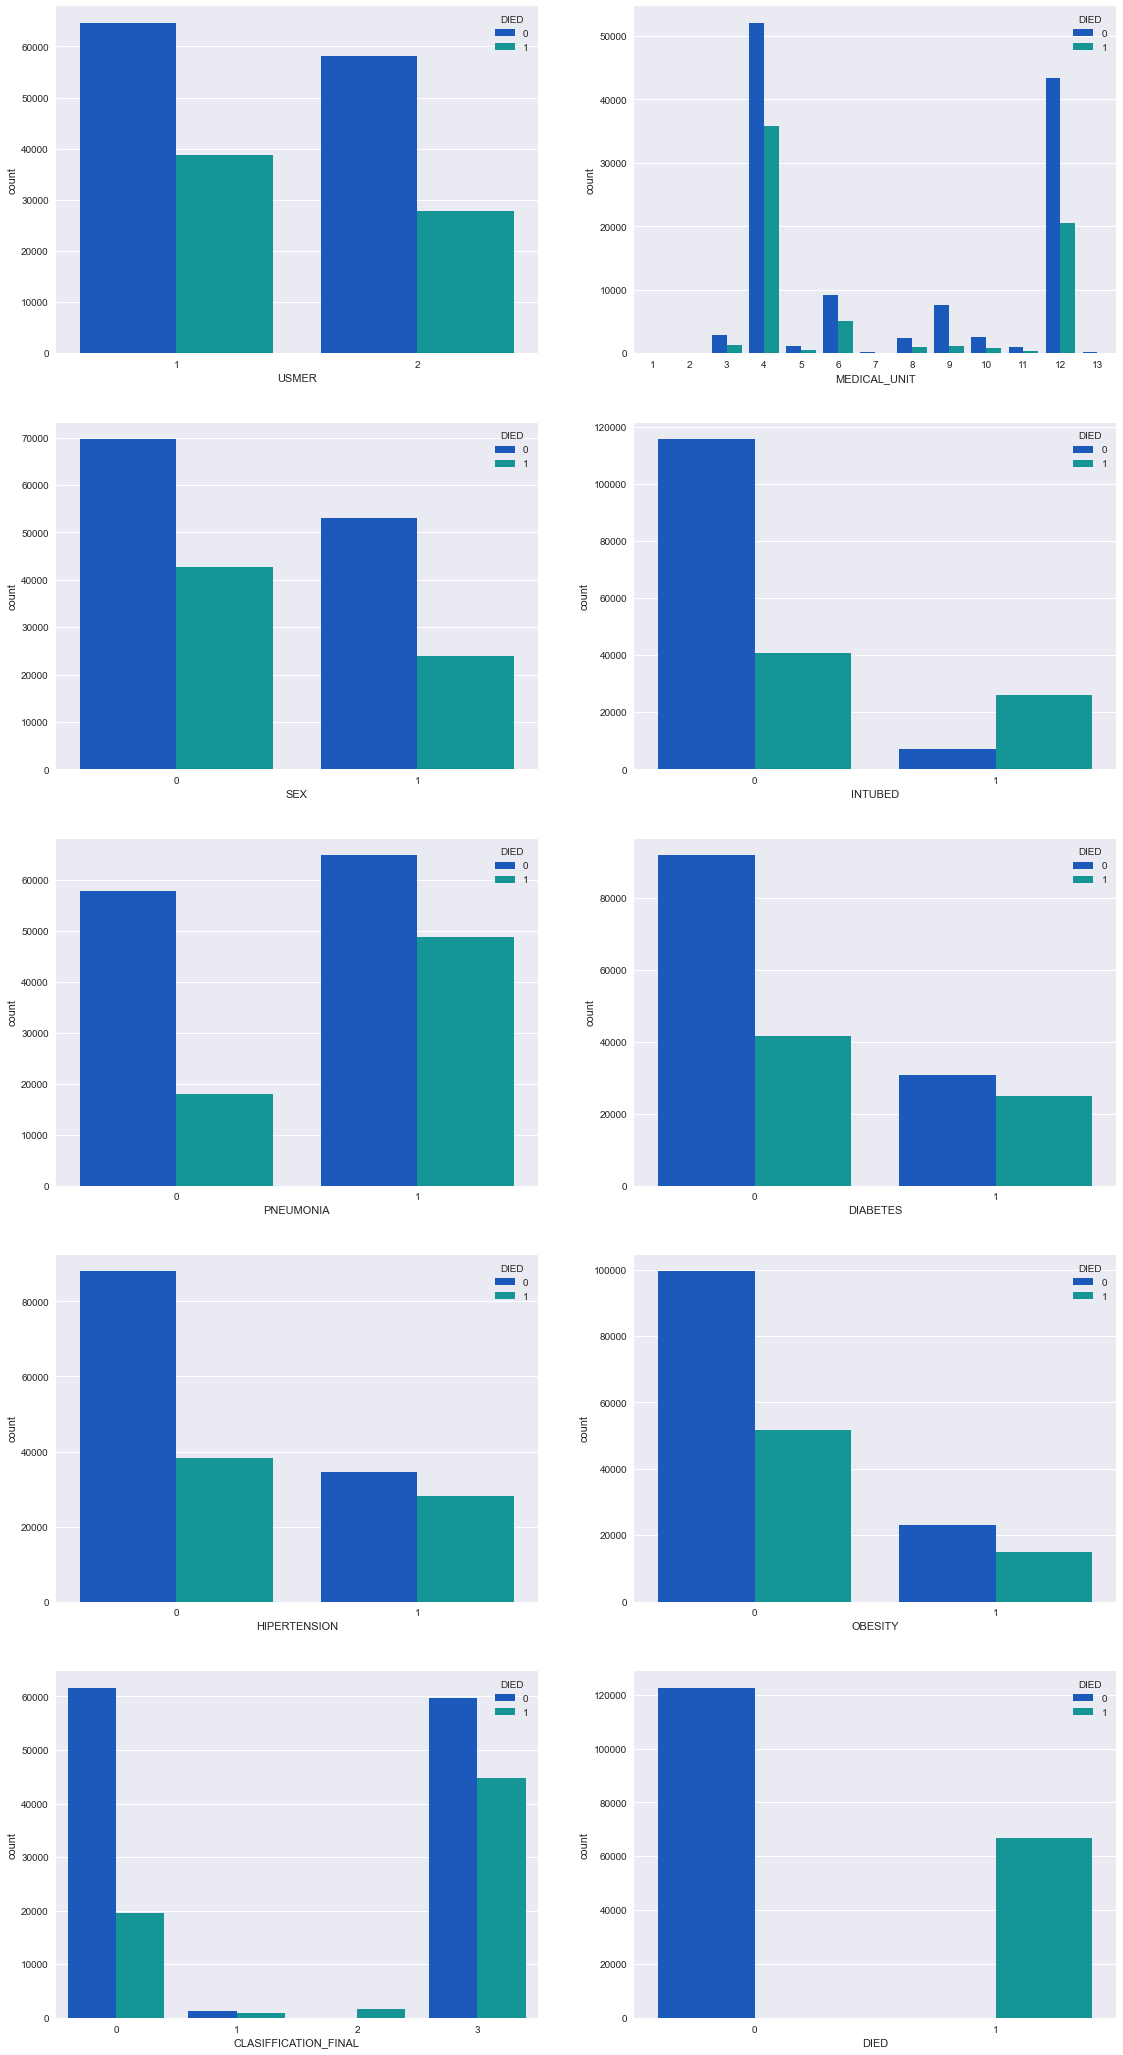

In [11]:
#List of features to avoid graphing created as insights were minimal with these features

nograph = [ "AGE", "PREGNANT", "COPD", 
           "ASTHMA", "OTHER_DISEASE", "CARDIOVASCULAR", "RENAL_CHRONIC"
          ,"TOBACCO", "ICU", "INMSUPR"]

#plot with for loop going through all features

eda = plt.style.use("seaborn")
eda = plt.subplots_adjust(hspace=0.2)
color = 'winter'

fig, axs = plt.subplots(5, 2, figsize=(19,37))
i=1
for feature in df.columns:
    if feature not in nograph and i <11:
        plt.subplot(5,2,i)
        sns.countplot(data=df, x=feature, palette=color, hue='DIED')
        i+=1

In the graphs above I chose to plot only the variables with meaningful data distributions, the variables left out of these are listed below. These were left out either because the ratio of **Yes(1) and No(0)** were not insightful (heavy lean to No) or the data would not be plotted correctly with the plot function used. 


1. DATE_DIED
2. AGE
3. PATIENT_TYPE
4. PREGNANT
5. COPD 
6. ASTHMA
7. OTHER_DISEASE
8. CARDIOVASCULAR
9. RENAL_CHRONIC
10. TOBACCO
11. ICU
12. INMSUPR

Due to the danger of Covid-19 to people of an older age, I thought a histogram of the Age vs Death or no Death would be interesting to see. As we can see, there are in fact more deaths as age increases, with the median being close to 60 years of age.

<AxesSubplot:xlabel='AGE', ylabel='Count'>

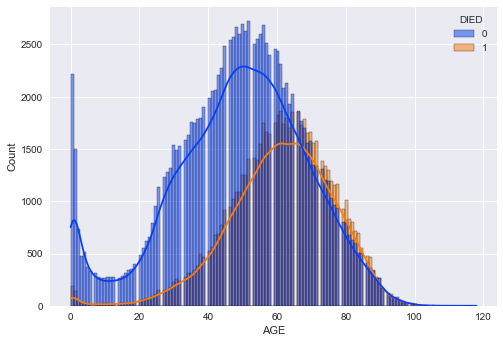

In [12]:
#plot for age distribution against 'DIED'

sns.histplot(data = df, x = "AGE", kde = True, hue = 'DIED', palette = 'bright')

<AxesSubplot:>

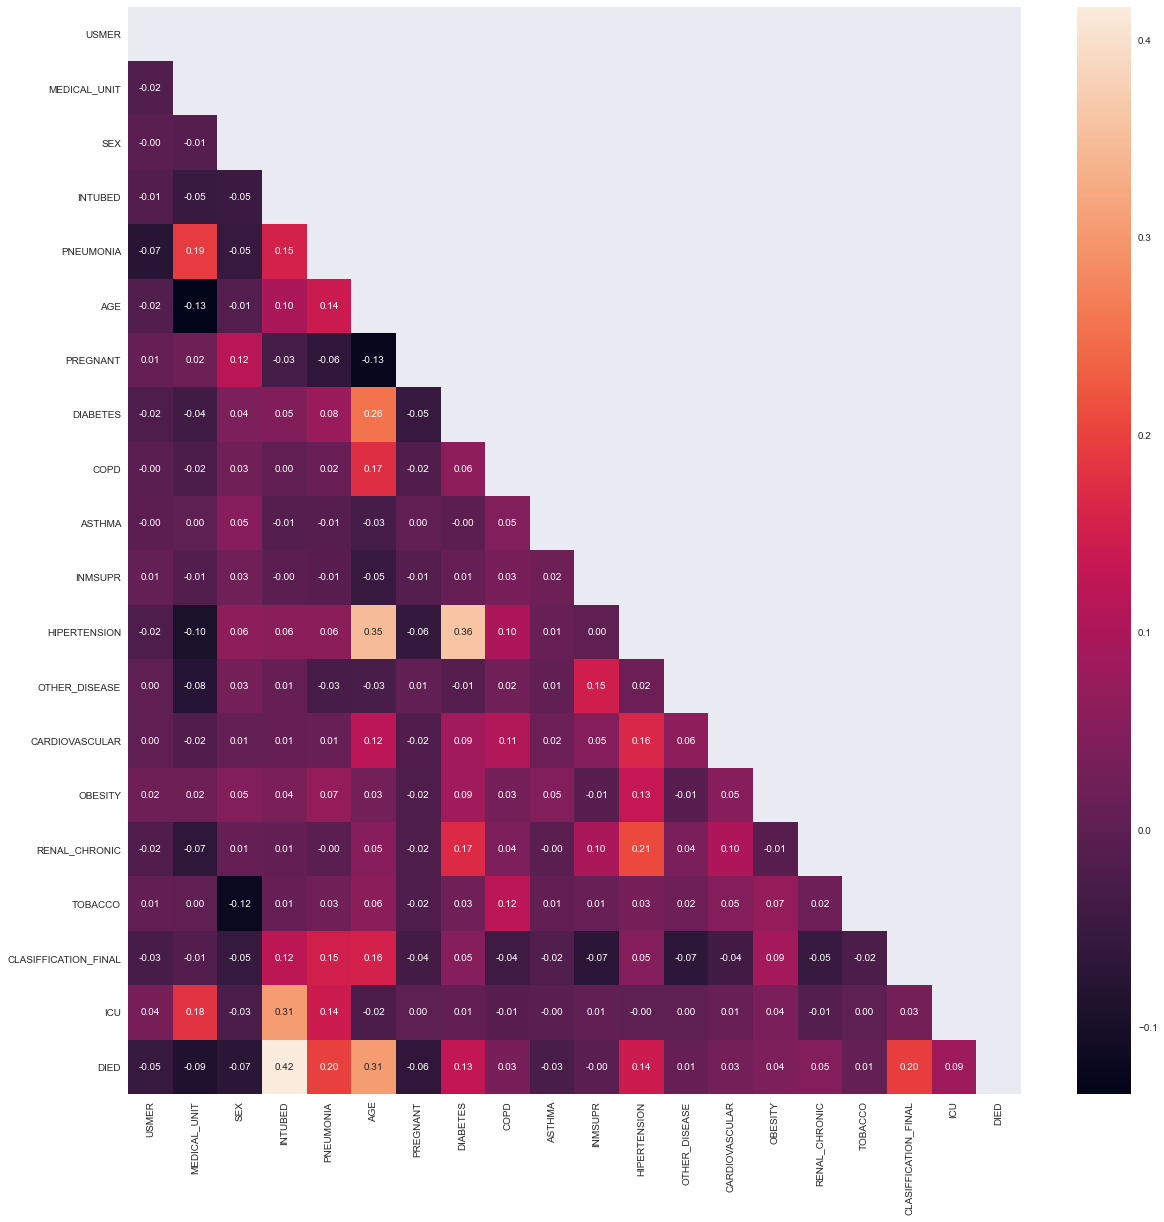

In [13]:
#correlation matrix created, mostly to show correlation with 'DIED' feature

corr = df.corr()
matrix = np.triu(corr)

plt.figure(figsize = (20,20))
sns.heatmap(df.corr(),mask = matrix, annot = True, fmt = '.2f')

Above is correlation matrix between all features in the data set, at this moment we mostly care about features correlating to our **DIED** column. As we can see, **INTUBED**, **PNEUMONIA**, **AGE**, **DIABETES**, **HYPERTENSION**, and **CLASIFFICATION_FINAL** have the strongest correlation with **DIED**. There are other interesting correaltions presented here as well, such as hypertension with age and diabetes, however, they are not pertinent to goal of this project, maybe in another they could be explored.

I dropped all columns that did not reach a .1 correlation.

In [14]:
#Dropping features with little to no correlation to 'DIED'

df.drop(columns= ['USMER','SEX','PREGNANT','COPD','ASTHMA','INMSUPR',
                  'OTHER_DISEASE','CARDIOVASCULAR','OBESITY','RENAL_CHRONIC',
                 'TOBACCO'], inplace = True)

# Decision Tree Model
For my first classifier algorithm, I decided to try and use a Decision Tree to predict whether or not a patient would be correctly classified as "Died" or not. Further on, I explore the importance of each feature the algorithm calculated.

First, let's begin by dividing the data into our variables and target outcome dataframes. 

In [15]:
# Dividing data into seperate features and target dataframes

X = df.drop(columns="DIED")
y = df["DIED"]

y.head()

2     1
5     0
8     0
9     0
11    0
Name: DIED, dtype: int64

Next, I chose to let the decision tree work on it's own, without specifying the maximum depth the tree should stop at. 

In [16]:
#making decision tree without specifying the max_depth parameter

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .25, random_state = 42)
dtree = DecisionTreeClassifier(random_state=42)

dtree.fit(X_train, y_train)
yhat = dtree.predict(X_test)

print('Training Accuracy: ' +str(dtree.score(X_train,y_train)))
print('Testing Accuracy: ' +str(accuracy_score(yhat, y_test)))

Training Accuracy: 0.7961890673429135
Testing Accuracy: 0.7572747828659581


With such a difference between the train and test accuracy, I beleive there to be some overfitting happening to the trainied model. 

Below I have a comparison of the accuracy between the training data and test data, depending on the depth of the tree. 

In [17]:
#creating empty lists for dataframe creation in the for loop
depth, treetrain, treetest = [],[],[]
for i in range(1,30):
    
    #define depth each loop 
    dtree = DecisionTreeClassifier(max_depth = i, random_state=0)
    
    #fit model and predict target y
    dtree.fit(X_train, y_train)
    yhat = dtree.predict(X_test)
    
    #append values from each depth
    depth.append(i)
    treetrain.append(dtree.score(X_train,y_train))
    treetest.append(accuracy_score(yhat, y_test))

treedf = pd.DataFrame({'Tree Depth':depth, 'Train Score':treetrain,'Test Score':treetest})
treedf.head()

,Tree Depth,Train Score,Test Score
0,1,0.747527,0.747110
1,2,0.749190,0.749097
2,3,0.749951,0.749709
3,4,0.758876,0.758902
4,5,0.764067,0.763488


In the cell above, I chose to compute the accuracy score for the train and test data as the depth of the tree increases, we see that in the graph below, as we increase the depth of the tree, our training score increases continualy as it becomes overfitted to the training data. This claim is backed up as the performance of the model on test data decreases as depth increases.

Text(0.5, 1.0, 'Accuracy Score VS Tree Depth')

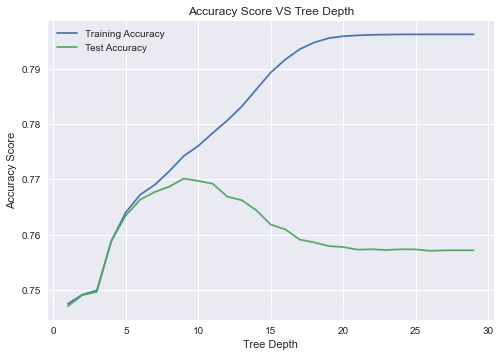

In [18]:
#plot data frame of training VS testing scores

plt.plot("Tree Depth", "Train Score", data = treedf)
plt.plot("Tree Depth", "Test Score", data = treedf)
plt.legend(['Training Accuracy', "Test Accuracy"],loc=2)
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy Score')
plt.title("Accuracy Score VS Tree Depth")

Based on the graph above, we can assume that the optimal model depth must lie somewhere in between 5-10. I decided to use Gridsearch to help me determine the correct depth, using a 5 cross-validation parameter. 

In [19]:
#Using gridsearch to find optimal depth for our descision tree

parameters = {"max_depth": range(1,20)}
grid_search = GridSearchCV(DecisionTreeClassifier(),parameters, cv=5)

grid_search.fit(X_train, y_train)

best_depth = grid_search.best_params_

print("The best depth for the model: "+ str(best_depth['max_depth']))

The best depth for the model: 9


In [20]:
#Using best max_depth to fit model

dtree = DecisionTreeClassifier(max_depth = best_depth['max_depth'], random_state=0)
    
#fit model and predict target y

dtree.fit(X_train, y_train)
yhat = dtree.predict(X_test)

#print accuracy scores

print('Training Accuracy with best depth: ' +str(dtree.score(X_train,y_train)))
print('Testing Accuracy with best depth: ' +str(accuracy_score(yhat, y_test)))

Training Accuracy with best depth: 0.7742321780783319
Testing Accuracy with best depth: 0.770144333382642


These outputs are better and show that the model is not over fitting the training data anymore.

Text(0, 0.5, 'Accuracy')

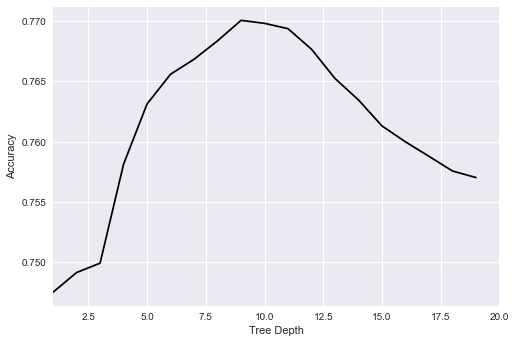

In [21]:
#plotting relationship of accuracy to max_depth

mean_score = grid_search.cv_results_['mean_test_score']
depth = np.linspace(1,19,19)
plt.plot(depth, mean_score, color = 'black')
plt.xlim(1,20)
plt.xlabel("Tree Depth")
plt.ylabel("Accuracy")

True Positve Rate: 0.5234838941875113
True Negative Rate: 0.9043066884176183


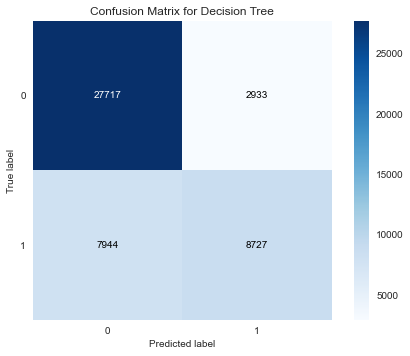

In [22]:
#confusion matrix for desicion tree

skplt.metrics.plot_confusion_matrix(y_test, yhat, normalize=False, title = 'Confusion Matrix for Decision Tree')

#Calculation for TPR and TNR

conf_M_tree = pd.crosstab(y_test,yhat)
TP_tree = conf_M_tree.iloc[1,1]
FN_tree = conf_M_tree.iloc[1,0]
FP_tree = conf_M_tree.iloc[0,1]
TN_tree = conf_M_tree.iloc[0,0]


TPR = TP_tree/(TP_tree+FN_tree)
TNR = TN_tree/(TN_tree+FP_tree)

print('True Positve Rate: '+str(TPR))
print('True Negative Rate: '+str(TNR))


Our model performs well with negative predictions, as our True Negative Rate is .90, however the probability that the model correctly classifies someone as 'Dead' (True Postive Rate) is near .50, which is not good. Let's attempt to fix this with undersmapling by creating similar proportions of negative and postive target values. I will repeat the steps of training, testing, and evaluation again below.

In [23]:
#create sampler and fit to training data. 

sampler = RandomUnderSampler(random_state=0)
X_sampled,y_sampled = sampler.fit_resample(X,y)

In [24]:
#Reapting steps for training and testing but this time using sampled data. 

X_train, X_test, y_train, y_test = train_test_split(X_sampled,y_sampled,test_size = .25, random_state = 42)

parameters = {"max_depth": range(1,20)}
grid_search = GridSearchCV(DecisionTreeClassifier(),parameters, cv=5)

grid_search.fit(X_train, y_train)

best_depth = grid_search.best_params_

dtree = DecisionTreeClassifier(random_state=42,max_depth = best_depth['max_depth'])

dtree.fit(X_train, y_train)
yhat = dtree.predict(X_test)

print("The best depth for the model: "+ str(best_depth['max_depth']))
print('Training Accuracy: ' +str(dtree.score(X_train,y_train)))
print('Testing Accuracy: ' +str(accuracy_score(yhat, y_test)))

The best depth for the model: 9
Training Accuracy: 0.740978620806947
Testing Accuracy: 0.7359764698820492


We have a similar depth for the decision tree model, however our accuracy has dropped a small amount, ~.70 for a model is not great, but also not terrible, this is something we can expect in a real world model. Lets examine if we were able to fix our our low TPR.

True Positve Rate: 0.700942433519419
True Negative Rate: 0.7710084033613446


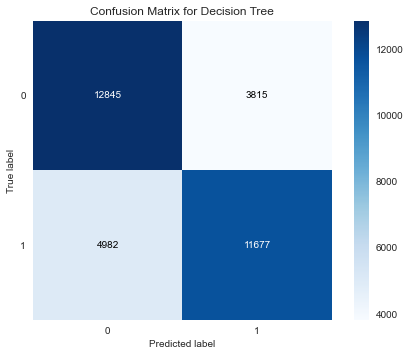

In [25]:
skplt.metrics.plot_confusion_matrix(y_test, yhat, normalize=False, title = 'Confusion Matrix for Decision Tree')

#Calculation for TPR and TNR

conf_M_tree = pd.crosstab(y_test,yhat)
TP_tree = conf_M_tree.iloc[1,1]
FN_tree = conf_M_tree.iloc[1,0]
FP_tree = conf_M_tree.iloc[0,1]
TN_tree = conf_M_tree.iloc[0,0]


TPR = TP_tree/(TP_tree+FN_tree)
TNR = TN_tree/(TN_tree+FP_tree)

print('True Positve Rate: '+str(TPR))
print('True Negative Rate: '+str(TNR))

While we were able to raise our TPR, our TNR decreased to only a slightly higher value than our TPR. While a decrease in a value such as this may seem bad, it's better to have a similar rates in both of these metrics as it shows better probabilities in correctly predicting both true positive and true negative.

In [26]:
#creating list of column names

column_names = df.iloc[:,0:8].columns.tolist()

In [27]:
#finding most important predictor for decision tree

importance = pd.DataFrame(dtree.feature_importances_, index = column_names, columns = ['Importance'])
importance.sort_values(by = "Importance", ascending = False)

,Importance
INTUBED,0.484845
AGE,0.309006
MEDICAL_UNIT,0.069416
CLASIFFICATION_FINAL,0.068553
PNEUMONIA,0.047081
DIABETES,0.010366
ICU,0.006737
HIPERTENSION,0.003996


Above I have the features of the data listed out by most important to least. For our decision tree, the feature **INTUBED** is a strong predictor for if a patient died or not. In a close second, **AGE** also has a heavy weight. These results are not too surprising, as we saw above in the EDA portion with the correlation matrix, **AGE** and **INTUBED** had the strongest correlation with our **DIED** column. 

# KNN Model
I will now evaluate this dataset with a K Nearest Nieghbors algorithm.

In [28]:
#Creating dummy variables for categorical data

df = pd.get_dummies(df,columns=["MEDICAL_UNIT","CLASIFFICATION_FINAL"],drop_first=True)

In [29]:
#Scaling AGE feature

scaler = RobustScaler()
df.AGE = scaler.fit_transform(df.AGE.values.reshape(-1,1))

In order to properly use a KNN model, we need to reduce the number of samples in the data as KNN does not handle a large number samples well. Below, I chose to take a 7% sample, not for any particular reason, mostly because it was still a solid number of samples that did not cost a lot of memory or time when running this notebook. 

In [30]:
#randomize dataset, and take 7% sample 

df_randomized = df.sample(frac=.07, random_state=1)

#calculate index for split and take first 75% of the data for train data

train_test_index = round(len(df_randomized) * 0.75)

#create training and test data

train_set = df_randomized[:train_test_index].reset_index(drop=True)
test_set = df_randomized[train_test_index:].reset_index(drop=True)

#check that proportions are correct for the train and test data

print(train_set['DIED'].value_counts(normalize=True))
print(test_set['DIED'].value_counts(normalize=True))

0    0.644596
1    0.355404
Name: DIED, dtype: float64
0    0.641908
1    0.358092
Name: DIED, dtype: float64


As before in the desicion tree model, I also ran into the unproportional data issue, so I used RandomUnderSampler to help with this again. 

In [31]:
#creating train and test sets with the proportioned randomized data

X_train_random = train_set.drop(columns="DIED")
y_train_random = train_set["DIED"]

X_test_random = test_set.drop(columns="DIED")
y_test_random = test_set["DIED"]

#perform resampling for better proportions

sampler = RandomUnderSampler(random_state=0)
X_train_sampled,y_train_sampled = sampler.fit_resample(X_train_random,y_train_random)

sampler = RandomUnderSampler(random_state=0)
X_test_sampled,y_test_sampled = sampler.fit_resample(X_test_random,y_test_random)

In [32]:
#declare model, fit and predict values

knn_model = KNeighborsClassifier()
knn_classifier = knn_model.fit(X_train_sampled, y_train_sampled)
test_preds = knn_model.predict(X_test_sampled)

#checking accuracy scores 

print('Training Accuracy: '+str(knn_classifier.score(X_train_sampled, y_train_sampled)))
print('Testing Accuracy: '+str(accuracy_score(test_preds, y_test_sampled)))

Training Accuracy: 0.7749150622876557
Testing Accuracy: 0.6981450252951096


It's clear above, without any given parameters, the model is clearly overfitted to the training data, let's use Gridsearch to find our optimal neighbor count.

In [33]:
#parameters for gridsearch

parameters = {"n_neighbors": range(1, 41)}

#gridesearch for best neighbors

grid_search = GridSearchCV(knn_model, parameters, cv=5)
grid_search.fit(X_train_sampled, y_train_sampled)

#print best neighbors
best_neighbors = grid_search.best_params_

print('Optimal Neighbors: '+str(best_neighbors['n_neighbors']))

Optimal Neighbors: 31


In [34]:
#training knn model with best neighbors from gridsearch

knn_model = KNeighborsClassifier(n_neighbors = best_neighbors['n_neighbors'])
knn_classifier = knn_model.fit(X_train_sampled, y_train_sampled)
test_preds = knn_model.predict(X_test_sampled)

#printing accuracy scores

print('Training Accuracy with best neighbors: '+str(knn_classifier.score(X_train_sampled, y_train_sampled)))
print('Testing Accuracy with best neighbors: '+str(accuracy_score(test_preds, y_test_sampled)))

Training Accuracy with best neighbors: 0.7406568516421291
Testing Accuracy with best neighbors: 0.725548060708263


These results are better and represent a more generalized model.

Text(0, 0.5, 'Accuracy')

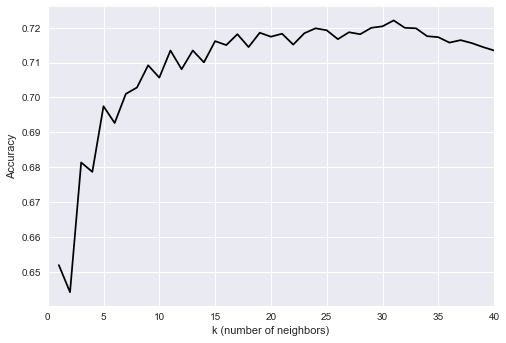

In [35]:
# graph for accuracy as number of neighbors increases for knn model

mean_score = grid_search.cv_results_['mean_test_score']
neighbors = np.linspace(1,40,40)
plt.plot(neighbors, mean_score, color = 'black')
plt.xlim(0,40)
plt.xlabel("k (number of neighbors)")
plt.ylabel("Accuracy")

True Positve Rate: 0.6930860033726813
True Negative Rate: 0.7580101180438449


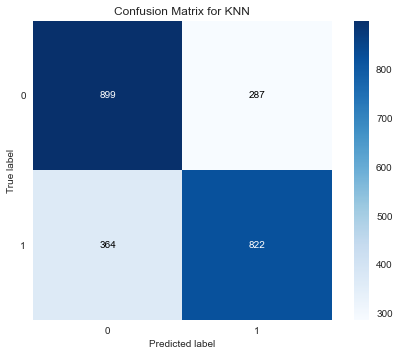

In [36]:
#confusion matrix for knn model in comparison to decision tree model 

skplt.metrics.plot_confusion_matrix(y_test_sampled, test_preds, normalize=False, title = 'Confusion Matrix for KNN')

conf_M_knn = pd.crosstab(y_test_sampled,test_preds)
TP_knn = conf_M_knn.iloc[1,1]
FN_knn = conf_M_knn.iloc[1,0]
FP_knn = conf_M_knn.iloc[0,1]
TN_knn = conf_M_knn.iloc[0,0]

TPR = TP_knn/(TP_knn+FN_knn)
TNR = TN_knn/(TN_knn+FP_knn)
print('True Positve Rate: '+str(TPR))
print('True Negative Rate: '+str(TNR))

Our TPR and TNR are slightly similar to our desicion tree model output.

# Conclusion
In total, our two models did not differ too dramatically, although, I would have to say that we did have better accuracy with our decision tree model. One issue with KNN is that it cannot handle many samples, while the decision tree did not need partitioned/sampled data fed into it. I would say overall, for a large sample, classification problem my go to would be a decision tree model, purely based off of performance and results seen in this project. 

We also found the features that indicated toward a death more, which were our **AGE** and **INTUBED** features. To me, these are not too surprising, as immune system performance decreases with age, and if you are intubated in a hospital, I would say it's likely that you are in an already unstable condition due to covid complications. One thing I would like to test in the future is finding the preconditions, such as diabetes or hypertension, that lead to death in a patient. Perhaps I will come back and remove all features that are not associated with a patient. Hindsight is 20/20 I suppose.

Overall, I enjoyed working through this project, I feel that it gave me some exposure on how to handle issues with data that I may experience in a real world machine learning project.  
